# Basic Computer Vision

## Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Load Fashion MNIST

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,  test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


### Look at an example image

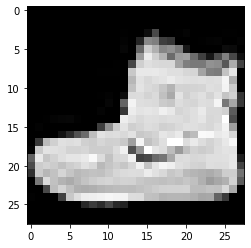

In [4]:
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)


## Define NN

Initial structure was a dense 128 neuron layer. The labels are integer based, 
so I think I need to convert them to categorical vectors. 

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, keras.utils.to_categorical(train_labels, num_classes=10), 
          epochs=10, verbose=False)
print("Train Results")
print(model.evaluate(train_images, keras.utils.to_categorical(train_labels, num_classes=10), 
                     verbose=False))
print("Test Results")
print(model.evaluate(test_images, keras.utils.to_categorical(test_labels, num_classes=10), 
                     verbose=False))

Train Results
[0.41639191270073256, 0.85676664]
Test Results
[0.5133643815994263, 0.8352]


What if I normalize the inputs?

As seen below, the loss actually drops from ~0.5 to ~0.35 which seems good. 
However, accuracy only rose from ~83% to ~88%.

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images/255, 
          keras.utils.to_categorical(train_labels, num_classes=10),
          epochs=10, verbose=False)
print("Train Results")
print(model.evaluate(train_images/255, keras.utils.to_categorical(train_labels, num_classes=10), 
                     verbose=False))
print("Test Results")
print(model.evaluate(test_images/255, keras.utils.to_categorical(test_labels, num_classes=10), 
                     verbose=False))

Train Results
[0.24622538375059763, 0.90743333]
Test Results
[0.36541660079956056, 0.8736]


## Callbacks

Callback below shows stopping on accuracy or loss. 
*important to remember* that I need to instantiate an instance of the class.
If I just pass in the class I'll get errors.

In [12]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.3 or logs.get('accuracy') > 0.85:
            print('\nGood enough for government work!')
            self.model.stop_training = True

callbacks = MyCallback()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images/255, 
          keras.utils.to_categorical(train_labels, num_classes=10),
          epochs=10, callbacks=[callbacks], verbose=False)
print("Train Results")
print(model.evaluate(train_images/255, keras.utils.to_categorical(train_labels, num_classes=10), 
                     verbose=False))
print("Test Results")
print(model.evaluate(test_images/255, keras.utils.to_categorical(test_labels, num_classes=10), 
                     verbose=False))

Train Results
[0.4014050737420718, 0.85513335]
Test Results
[0.44575618340969086, 0.8394]


## MNIST Digits

Big takeaways here. When the category is provided as an integer, 'sparse_categorical_crossentropy'
works fine without having to convert to a categorical vector.

In [18]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11493376/11490434 [==============================] - 3s 0us/step


In [19]:
class AccuracyLimiter(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print('\nNot bad, son!')
            self.model.stop_training = True

callbacks = AccuracyLimiter()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=10, verbose=False, callbacks=[callbacks])
print("Train Results")
print(model.evaluate(x_train, y_train, verbose=False))
print("Test Results")
print(model.evaluate(x_test, y_test, verbose=False))


Not bad, son!
Train Results
[0.02331355231538279, 0.99263334]
Test Results
[0.07350000056613352, 0.9779]
